---
# 💼 Attrition in an Organization || Why Workers Quit?

---

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact in productivity
> 1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

------
## 📌 Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?

---
# 📊 Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        > - categorical variables
        > - Categorical & Continous : Boxplots, Swamplots or even bar charts
- Detect outliers
- Feature engineering

In [ ]:
#Import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1EcAVooxX95zKnLAk21JsNnMkp8aGpPZM/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('WA_Fn-UseC_-HR-Employee-Attrition.csv.csv') 
 
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv.csv')

Ratio of classes is Yes : No =  237 : 1233


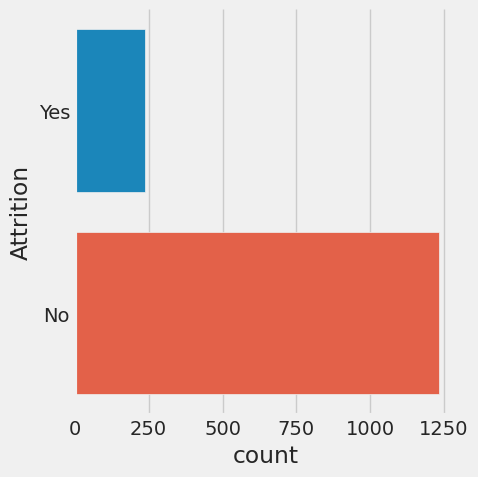

In [ ]:
sns.catplot(y = 'Attrition', data = df, kind = "count")
countN, countY = df['Attrition'].value_counts()
print("Ratio of classes is Yes : No = ", countY, ":", countN)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count   1470.00          1470.00        1470.00      1470.00   
mean       2.06             2.73        6502.93     14313.10   
std        1.11             1.10        4707.96      7117.79   
min        1.00             1.00        1009.00      2094.00   
25%        1.00             2.00        2911.00      8047.00   
50%        2.00             3.00        4919.00     14235.50   
75%        3.00             4.00        8379.00     20461.50   
max        5.00             4.00       19999.00     26999.00   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count             1470.00            1470.00            1470.00   
mean                 2.69              15.21               3.15   
std                  2.50               3.66               0.36   
min                  0.00              11.00               3.00   
25%                  1.00              12.00               3.00   
50%                  2.00              14.00               3.00   
75%                  4.00              18.00               3.00   
max                  9.00              25.00               4.00   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                   1470.00        1470.00           1470.00   
mean                       2.71          80.00              0.79   
std                        1.08           0.00              0.85   
min                        1.00          80.00              0.00   
25%                        2.00          80.00              0.00   
50%                        3.00          80.00              1.00   
75%                        4.00          80.00              1.00   
max                        4.00          80.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count            1470.00                1470.00          1470.00   
mean               11.28                   2.80             2.76   
std                 7.78                   1.29             0.71   
min                 0.00                   0.00             1.00   
25%                 6.00                   2.00             2.00   
50%                10.00                   3.00             3.00   
75%                15.00                   3.00             3.00   
max                40.00                   6.00             4.00   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00             1470.00                  1470.00   
mean             7.01                4.23                     2.19   
std              6.13                3.62

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [ ]:
#Drop the unnecessary data
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','PerformanceRating'], axis="columns", inplace=True)

---
## 📉 Categorical Features

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [ ]:
len(object_col)

7

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

---
## 📉 Numerical Features

In [ ]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [ ]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


---
## 📉 Data Visualisation

In [ ]:
!pip install -q hvplot

import hvplot.pandas
import hvplot
%matplotlib inline

In [ ]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [ ]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [ ]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

In [ ]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [ ]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

In [ ]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [ ]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [ ]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

In [ ]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [ ]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (StockOptionLevel_count)

In [ ]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

## 📌 Note

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

In [ ]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [ ]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [ ]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [ ]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

***

## 📝 **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

---
# 🔨 Data Processing

Ratio of classes is Yes : No =  237 : 1233


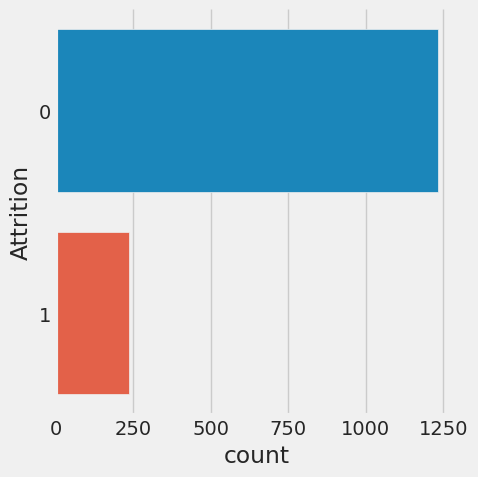

In [ ]:
sns.catplot(y = 'Attrition', data = df, kind = "count")
countN, countY = df['Attrition'].value_counts()
print("Ratio of classes is Yes : No = ", countY, ":", countN)

In [ ]:
cleaned_data = df

In [ ]:
cleaned_data['JobInvolvement High'] = (cleaned_data['JobInvolvement'] > 2)
cleaned_data['EnvironmentSatisfaction High'] = (cleaned_data['EnvironmentSatisfaction'] > 2)
cleaned_data['JobSatisfaction High'] = (cleaned_data['JobSatisfaction'] > 2)
cleaned_data['StockOption Yes'] = (cleaned_data['StockOptionLevel'] > 0)
cleaned_data['RelationshipSatisfaction High'] = (cleaned_data['RelationshipSatisfaction'] > 2)
cleaned_data['WorkLifeBalance High'] = (cleaned_data['WorkLifeBalance'] > 2)
cleaned_data['JobLevel High'] = (cleaned_data['JobLevel'] > 2)

new = cleaned_data.drop(['JobInvolvement','EnvironmentSatisfaction','JobSatisfaction','StockOptionLevel','RelationshipSatisfaction','WorkLifeBalance','JobLevel'], axis=1)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1470 non-null   int64 
 1   Attrition                      1470 non-null   int64 
 2   BusinessTravel                 1470 non-null   object
 3   DailyRate                      1470 non-null   int64 
 4   Department                     1470 non-null   object
 5   DistanceFromHome               1470 non-null   int64 
 6   Education                      1470 non-null   int64 
 7   EducationField                 1470 non-null   object
 8   Gender                         1470 non-null   object
 9   HourlyRate                     1470 non-null   int64 
 10  JobRole                        1470 non-null   object
 11  MaritalStatus                  1470 non-null   object
 12  MonthlyIncome                  1470 non-null   int64 
 13  Mon

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

attrition_cat = new[['BusinessTravel','Department','Education','EducationField','JobLevel High','JobInvolvement High','EnvironmentSatisfaction High','Gender','JobSatisfaction High','RelationshipSatisfaction High','WorkLifeBalance High','JobRole','MaritalStatus','OverTime','StockOption Yes']]
ohe.fit(attrition_cat)
attrition_cat_ohe = pd.DataFrame(ohe.transform(attrition_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(attrition_cat.columns))

attrition_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BusinessTravel_Non-Travel            1470 non-null   float64
 1   BusinessTravel_Travel_Frequently     1470 non-null   float64
 2   BusinessTravel_Travel_Rarely         1470 non-null   float64
 3   Department_Human Resources           1470 non-null   float64
 4   Department_Research & Development    1470 non-null   float64
 5   Department_Sales                     1470 non-null   float64
 6   Education_1                          1470 non-null   float64
 7   Education_2                          1470 non-null   float64
 8   Education_3                          1470 non-null   float64
 9   Education_4                          1470 non-null   float64
 10  Education_5                          1470 non-null   float64
 11  EducationField_Human Resources

In [ ]:
cleaned_data_num = cleaned_data[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','DistanceFromHome']]
cleaned_data_res = cleaned_data['Attrition']
cleaned_data_ohe = pd.concat([cleaned_data_num, attrition_cat_ohe, cleaned_data_res], 
                           sort = False, axis = 1).reindex(index=cleaned_data_num.index)
cleaned_data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1470 non-null   int64  
 1   DailyRate                            1470 non-null   int64  
 2   HourlyRate                           1470 non-null   int64  
 3   MonthlyIncome                        1470 non-null   int64  
 4   MonthlyRate                          1470 non-null   int64  
 5   NumCompaniesWorked                   1470 non-null   int64  
 6   PercentSalaryHike                    1470 non-null   int64  
 7   TotalWorkingYears                    1470 non-null   int64  
 8   TrainingTimesLastYear                1470 non-null   int64  
 9   YearsAtCompany                       1470 non-null   int64  
 10  YearsInCurrentRole                   1470 non-null   int64  
 11  YearsSinceLastPromotion       

In [ ]:
cleaned_data_ohe = cleaned_data_ohe.drop(['Gender_Female', 'OverTime_No','JobLevel High_False','JobInvolvement High_False','EnvironmentSatisfaction High_False','JobSatisfaction High_False','RelationshipSatisfaction High_False','WorkLifeBalance High_False','StockOption Yes_False'], axis=1)

# 🤖 Applying machine learning algorithms

#Attempt 1: Decision Tree
Import Machine Learning Models from sklearn to perform Decision Tree on the dataset

[Text(0.49107142857142855, 0.9, 'OverTime_Yes <= 0.5\ngini = 0.272\nsamples = 1029\nvalue = [862, 167]\nclass = No'),
 Text(0.26785714285714285, 0.7, 'YearsAtCompany <= 1.5\ngini = 0.191\nsamples = 747\nvalue = [667, 80]\nclass = No'),
 Text(0.14285714285714285, 0.5, 'Age <= 31.5\ngini = 0.397\nsamples = 110\nvalue = [80, 30]\nclass = No'),
 Text(0.07142857142857142, 0.3, 'BusinessTravel_Travel_Frequently <= 0.5\ngini = 0.499\nsamples = 46\nvalue = [24, 22]\nclass = No'),
 Text(0.03571428571428571, 0.1, 'gini = 0.473\nsamples = 39\nvalue = [24, 15]\nclass = No'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Yes'),
 Text(0.21428571428571427, 0.3, 'MonthlyRate <= 26201.5\ngini = 0.219\nsamples = 64\nvalue = [56, 8]\nclass = No'),
 Text(0.17857142857142858, 0.1, 'gini = 0.198\nsamples = 63\nvalue = [56, 7]\nclass = No'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.39285714285714285, 0.5, 'YearsAtCompany <= 38.5\ngi

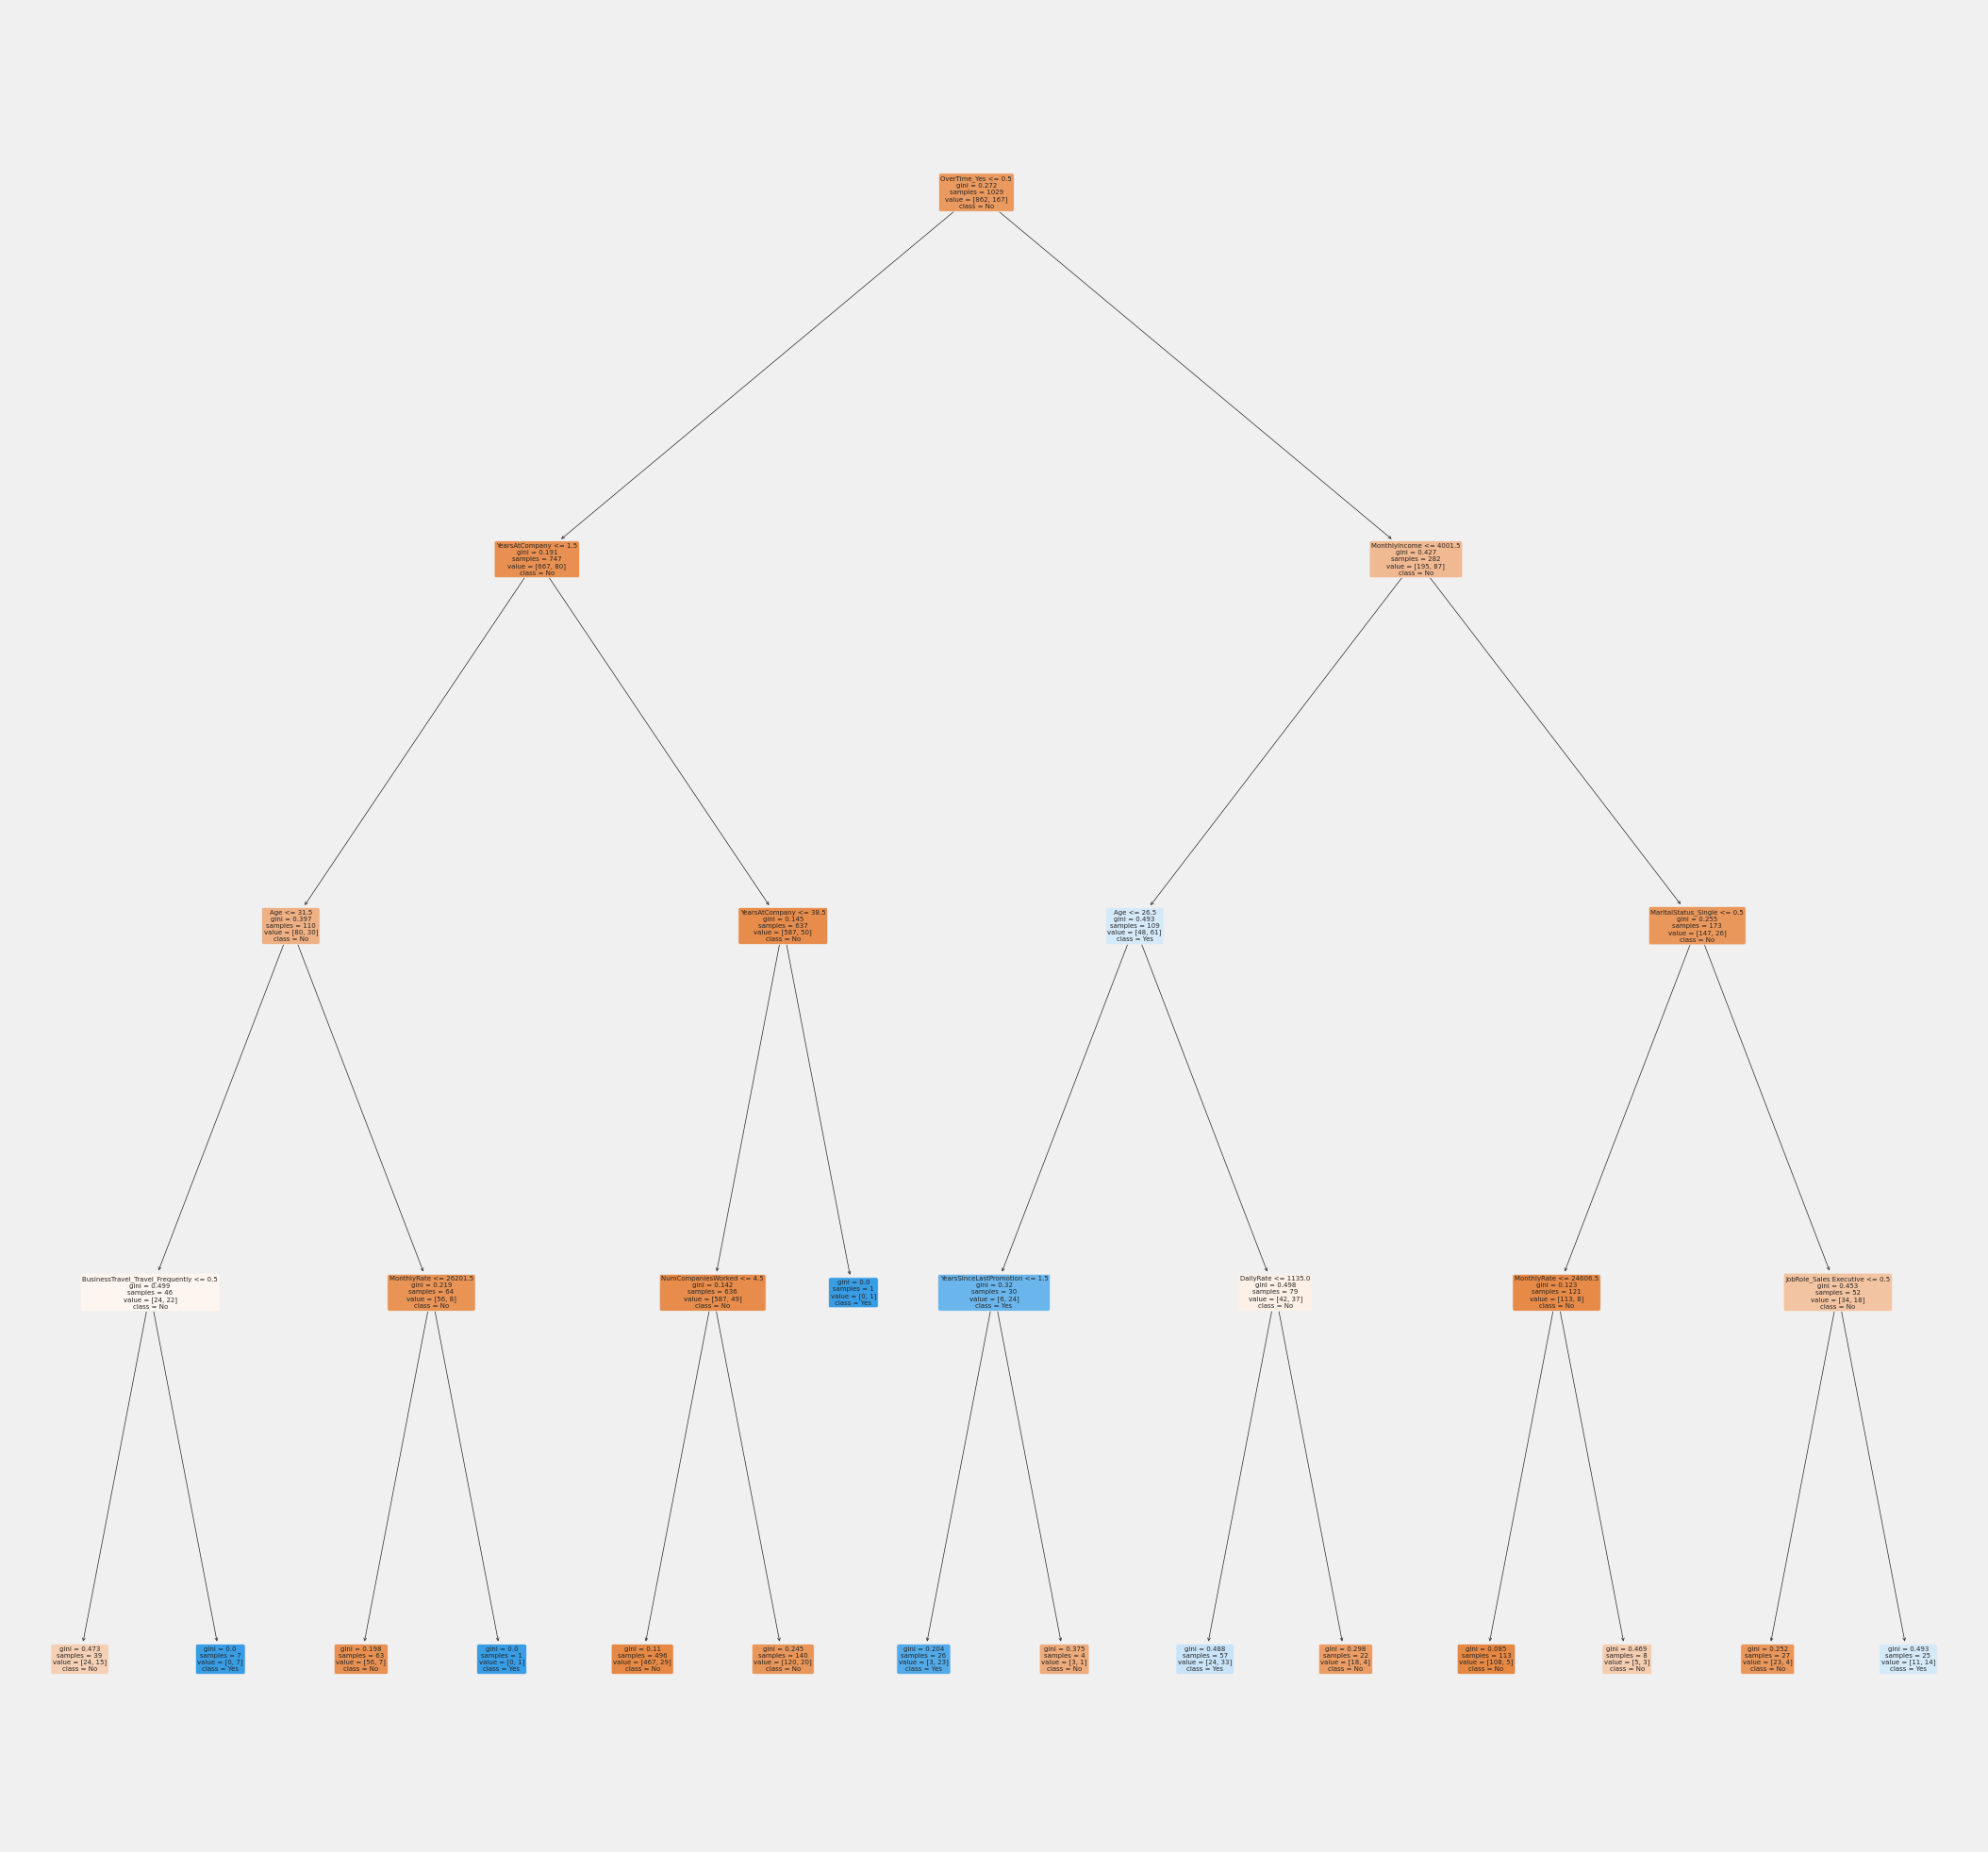

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

y = pd.DataFrame(cleaned_data_ohe['Attrition'])
X = pd.DataFrame(cleaned_data_ohe.drop('Attrition', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"])

Train Data
Accuracy  :	 0.8775510204081632

TPR Train :	 0.47305389221556887
TNR Train :	 0.9559164733178654

FPR Train :	 0.04408352668213457
FNR Train :	 0.5269461077844312


<Axes: >

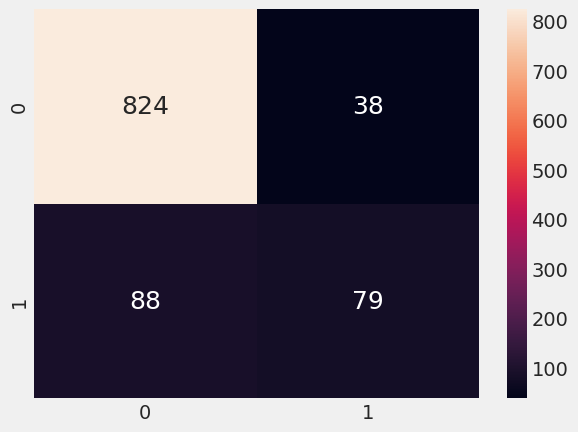

In [ ]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.854875283446712

TPR Test :	 0.34285714285714286
TNR Test :	 0.9514824797843666

FPR Test :	 0.04851752021563342
FNR Test :	 0.6571428571428571


<Axes: >

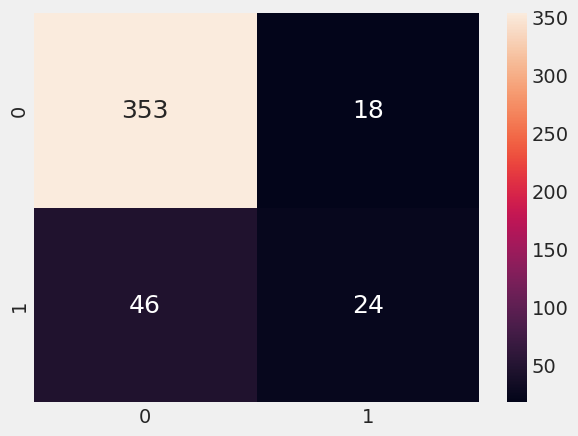

In [ ]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Attempt 2 -Resampling


In [ ]:
# Upsample Yes to match No
from sklearn.utils import resample

attriYes = cleaned_data_ohe[cleaned_data_ohe.Attrition == 1]
attriNo = cleaned_data_ohe[cleaned_data_ohe.Attrition == 0]
 

attriYes_up = resample(attriYes, 
                        replace=True,                              # sample with replacement
                        n_samples=attriNo.shape[0],
                        random_state = 0)                          # to match number of Good
 
# Combine the two classes back after upsampling
cleaned_data_ohe_up = pd.concat([attriNo, attriYes_up])
 
# Check the ratio of the classes
cleaned_data_ohe_up['Attrition'].value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

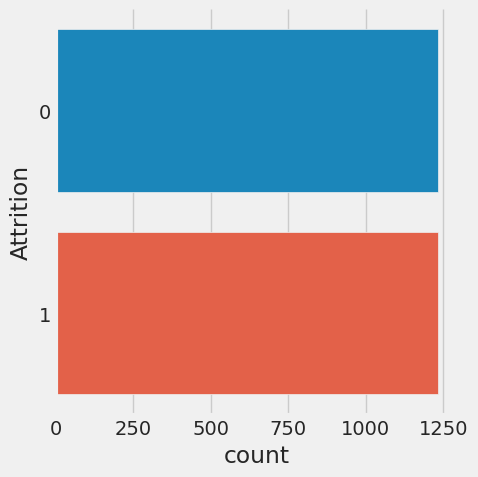

In [ ]:
# Quick plot to check the balanced classes visually
sns.catplot(y = 'Attrition', data = cleaned_data_ohe_up, kind = "count")

In [ ]:
# Confirm that the OHE is still in place
# and that the samples have now increased
cleaned_data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 1 to 1056
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2466 non-null   int64  
 1   DailyRate                           2466 non-null   int64  
 2   HourlyRate                          2466 non-null   int64  
 3   MonthlyIncome                       2466 non-null   int64  
 4   MonthlyRate                         2466 non-null   int64  
 5   NumCompaniesWorked                  2466 non-null   int64  
 6   PercentSalaryHike                   2466 non-null   int64  
 7   TotalWorkingYears                   2466 non-null   int64  
 8   TrainingTimesLastYear               2466 non-null   int64  
 9   YearsAtCompany                      2466 non-null   int64  
 10  YearsInCurrentRole                  2466 non-null   int64  
 11  YearsSinceLastPromotion             2466 no

[Text(0.5, 0.9, 'OverTime_Yes <= 0.5\ngini = 0.5\nsamples = 1726\nvalue = [851, 875]\nclass = Yes'),
 Text(0.25, 0.7, 'Age <= 33.5\ngini = 0.469\nsamples = 1050\nvalue = [655, 395]\nclass = No'),
 Text(0.125, 0.5, 'StockOption Yes_True <= 0.5\ngini = 0.498\nsamples = 508\nvalue = [237, 271]\nclass = Yes'),
 Text(0.0625, 0.3, 'YearsAtCompany <= 2.5\ngini = 0.441\nsamples = 299\nvalue = [98, 201]\nclass = Yes'),
 Text(0.03125, 0.1, 'gini = 0.268\nsamples = 132\nvalue = [21, 111]\nclass = Yes'),
 Text(0.09375, 0.1, 'gini = 0.497\nsamples = 167\nvalue = [77, 90]\nclass = Yes'),
 Text(0.1875, 0.3, 'TotalWorkingYears <= 1.5\ngini = 0.446\nsamples = 209\nvalue = [139, 70]\nclass = No'),
 Text(0.15625, 0.1, 'gini = 0.388\nsamples = 38\nvalue = [10, 28]\nclass = Yes'),
 Text(0.21875, 0.1, 'gini = 0.371\nsamples = 171\nvalue = [129, 42]\nclass = No'),
 Text(0.375, 0.5, 'YearsAtCompany <= 31.5\ngini = 0.353\nsamples = 542\nvalue = [418, 124]\nclass = No'),
 Text(0.3125, 0.3, 'MonthlyIncome <= 236

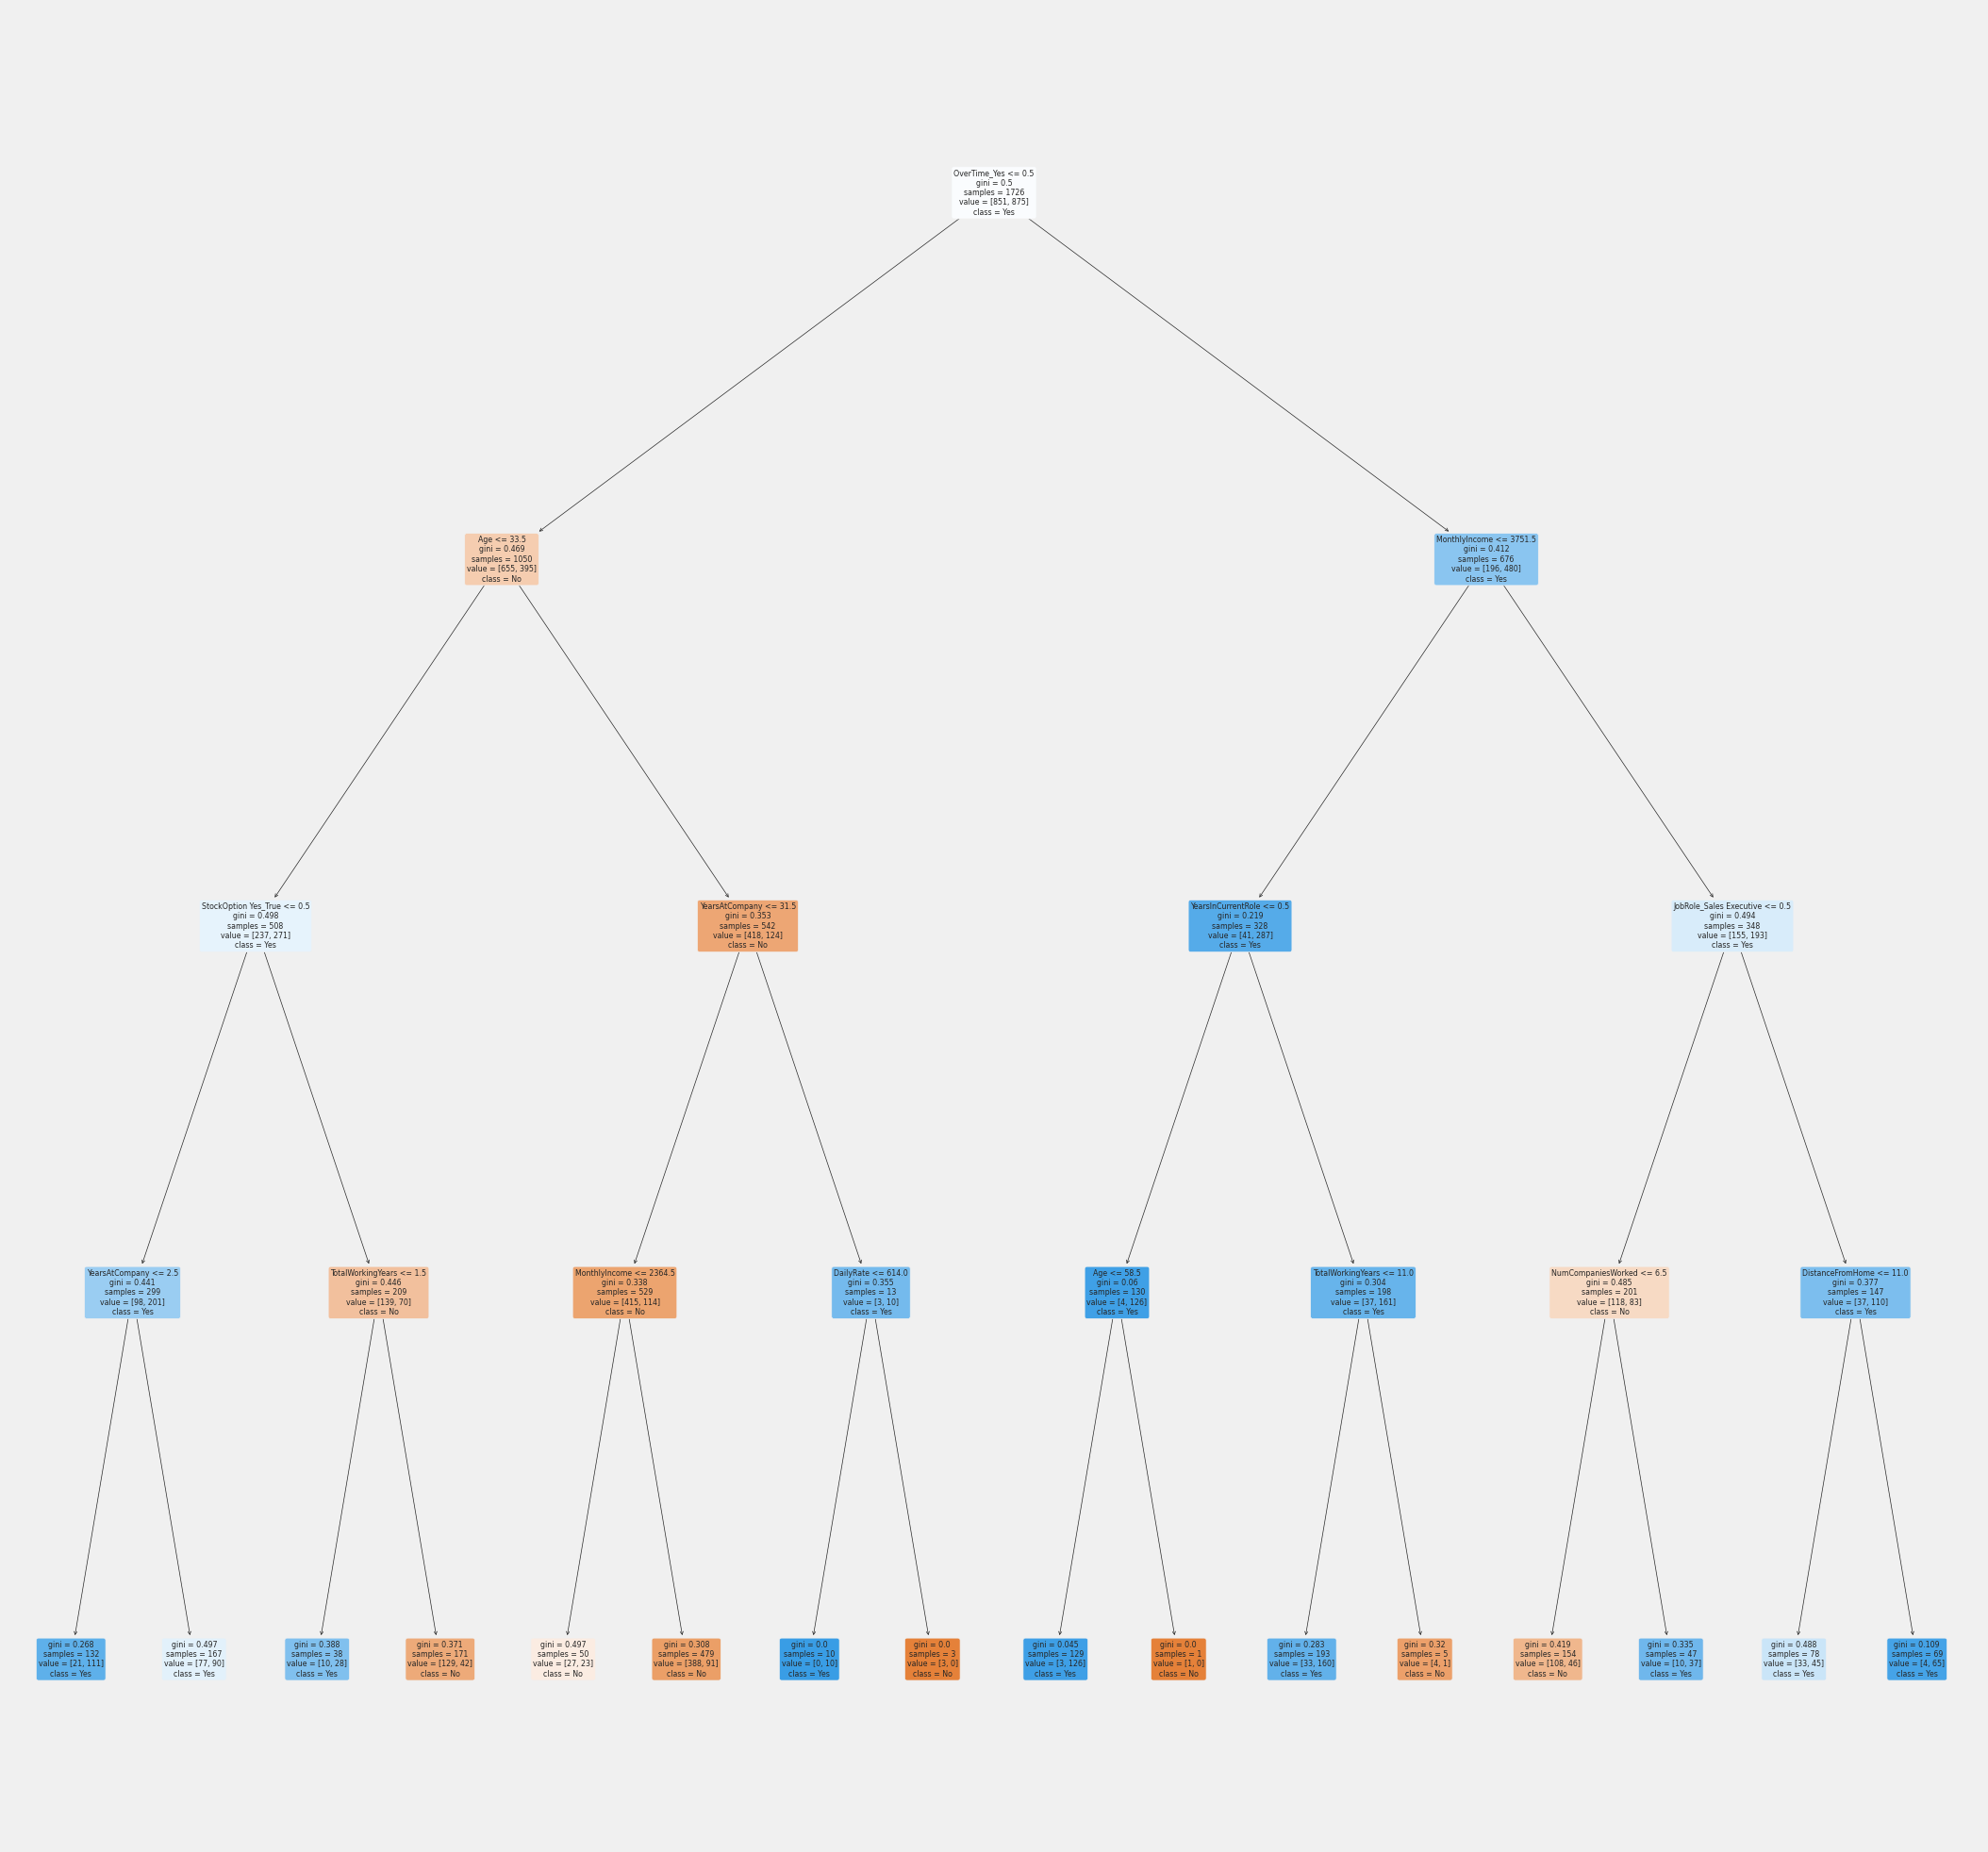

In [ ]:
y = pd.DataFrame(cleaned_data_ohe_up['Attrition'])
X = pd.DataFrame(cleaned_data_ohe_up.drop('Attrition', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"])

Train Data
Accuracy  :	 0.7717265353418308

TPR Train :	 0.768
TNR Train :	 0.7755581668625147

FPR Train :	 0.2244418331374853
FNR Train :	 0.232


<Axes: >

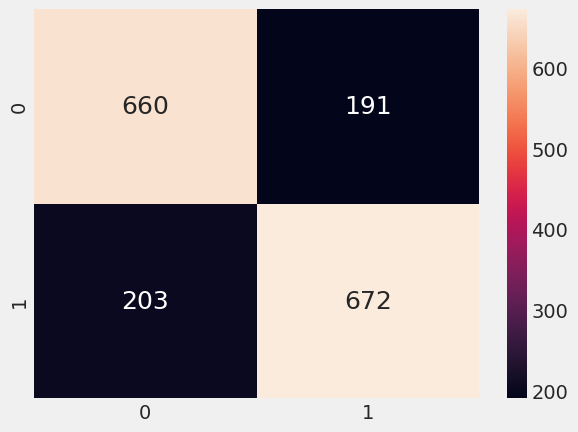

In [ ]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7391891891891892

TPR Test :	 0.7402234636871509
TNR Test :	 0.7382198952879581

FPR Test :	 0.2617801047120419
FNR Test :	 0.25977653631284914


<Axes: >

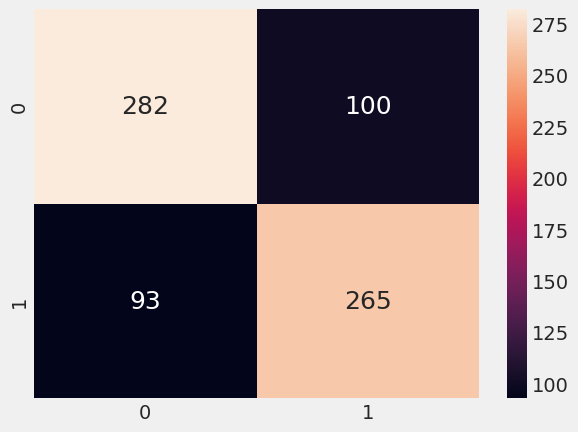

In [ ]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#Attempt 3- Random Forest

In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(cleaned_data_ohe_up['Attrition'])
X = pd.DataFrame(cleaned_data_ohe_up.drop('Attrition', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,                    # n_estimators denote number of trees
                                 max_depth = 4, random_state = 0)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Attrition.ravel())

RandomForestClassifier(max_depth=4, random_state=0)

Train Data
Accuracy  :	 0.8146002317497103

TPR Train :	 0.7954285714285714
TNR Train :	 0.8343125734430082

FPR Train :	 0.16568742655699178
FNR Train :	 0.20457142857142857


<Axes: >

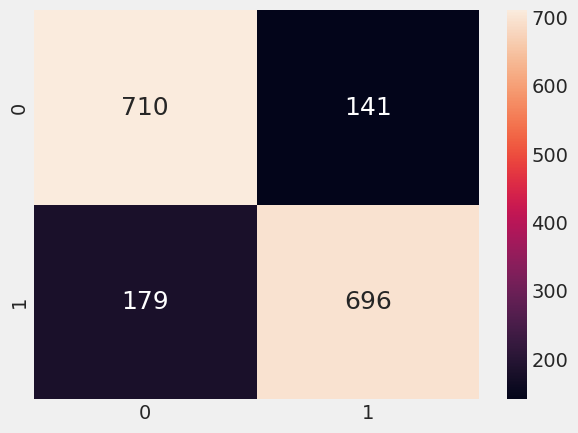

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7743243243243243

TPR Test :	 0.7737430167597765
TNR Test :	 0.774869109947644

FPR Test :	 0.225130890052356
FNR Test :	 0.22625698324022347


<Axes: >

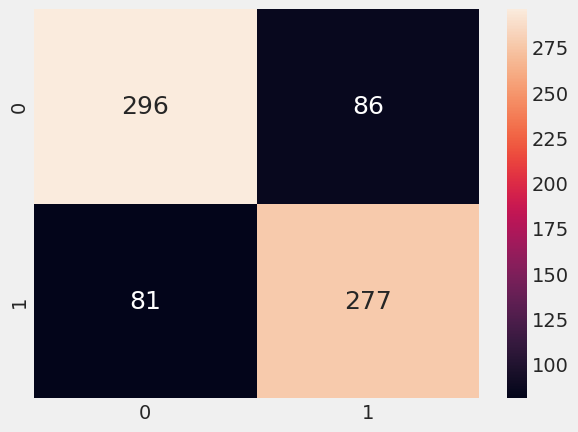

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

From observation, Decision Tree Classifier produced the most accurate result.

###Attempt 4- Increase the Depth of Decision Trees in the Forest


[Text(0.4641628440366973, 0.9444444444444444, 'OverTime_Yes <= 0.5\ngini = 0.272\nsamples = 1029\nvalue = [862, 167]\nclass = No'),
 Text(0.21330275229357798, 0.8333333333333334, 'YearsAtCompany <= 1.5\ngini = 0.191\nsamples = 747\nvalue = [667, 80]\nclass = No'),
 Text(0.10206422018348624, 0.7222222222222222, 'Age <= 31.5\ngini = 0.397\nsamples = 110\nvalue = [80, 30]\nclass = No'),
 Text(0.05045871559633028, 0.6111111111111112, 'BusinessTravel_Travel_Frequently <= 0.5\ngini = 0.499\nsamples = 46\nvalue = [24, 22]\nclass = No'),
 Text(0.04128440366972477, 0.5, 'DailyRate <= 343.5\ngini = 0.473\nsamples = 39\nvalue = [24, 15]\nclass = No'),
 Text(0.01834862385321101, 0.3888888888888889, 'BusinessTravel_Travel_Rarely <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = Yes'),
 Text(0.009174311926605505, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.027522935779816515, 0.2777777777777778, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Yes'),

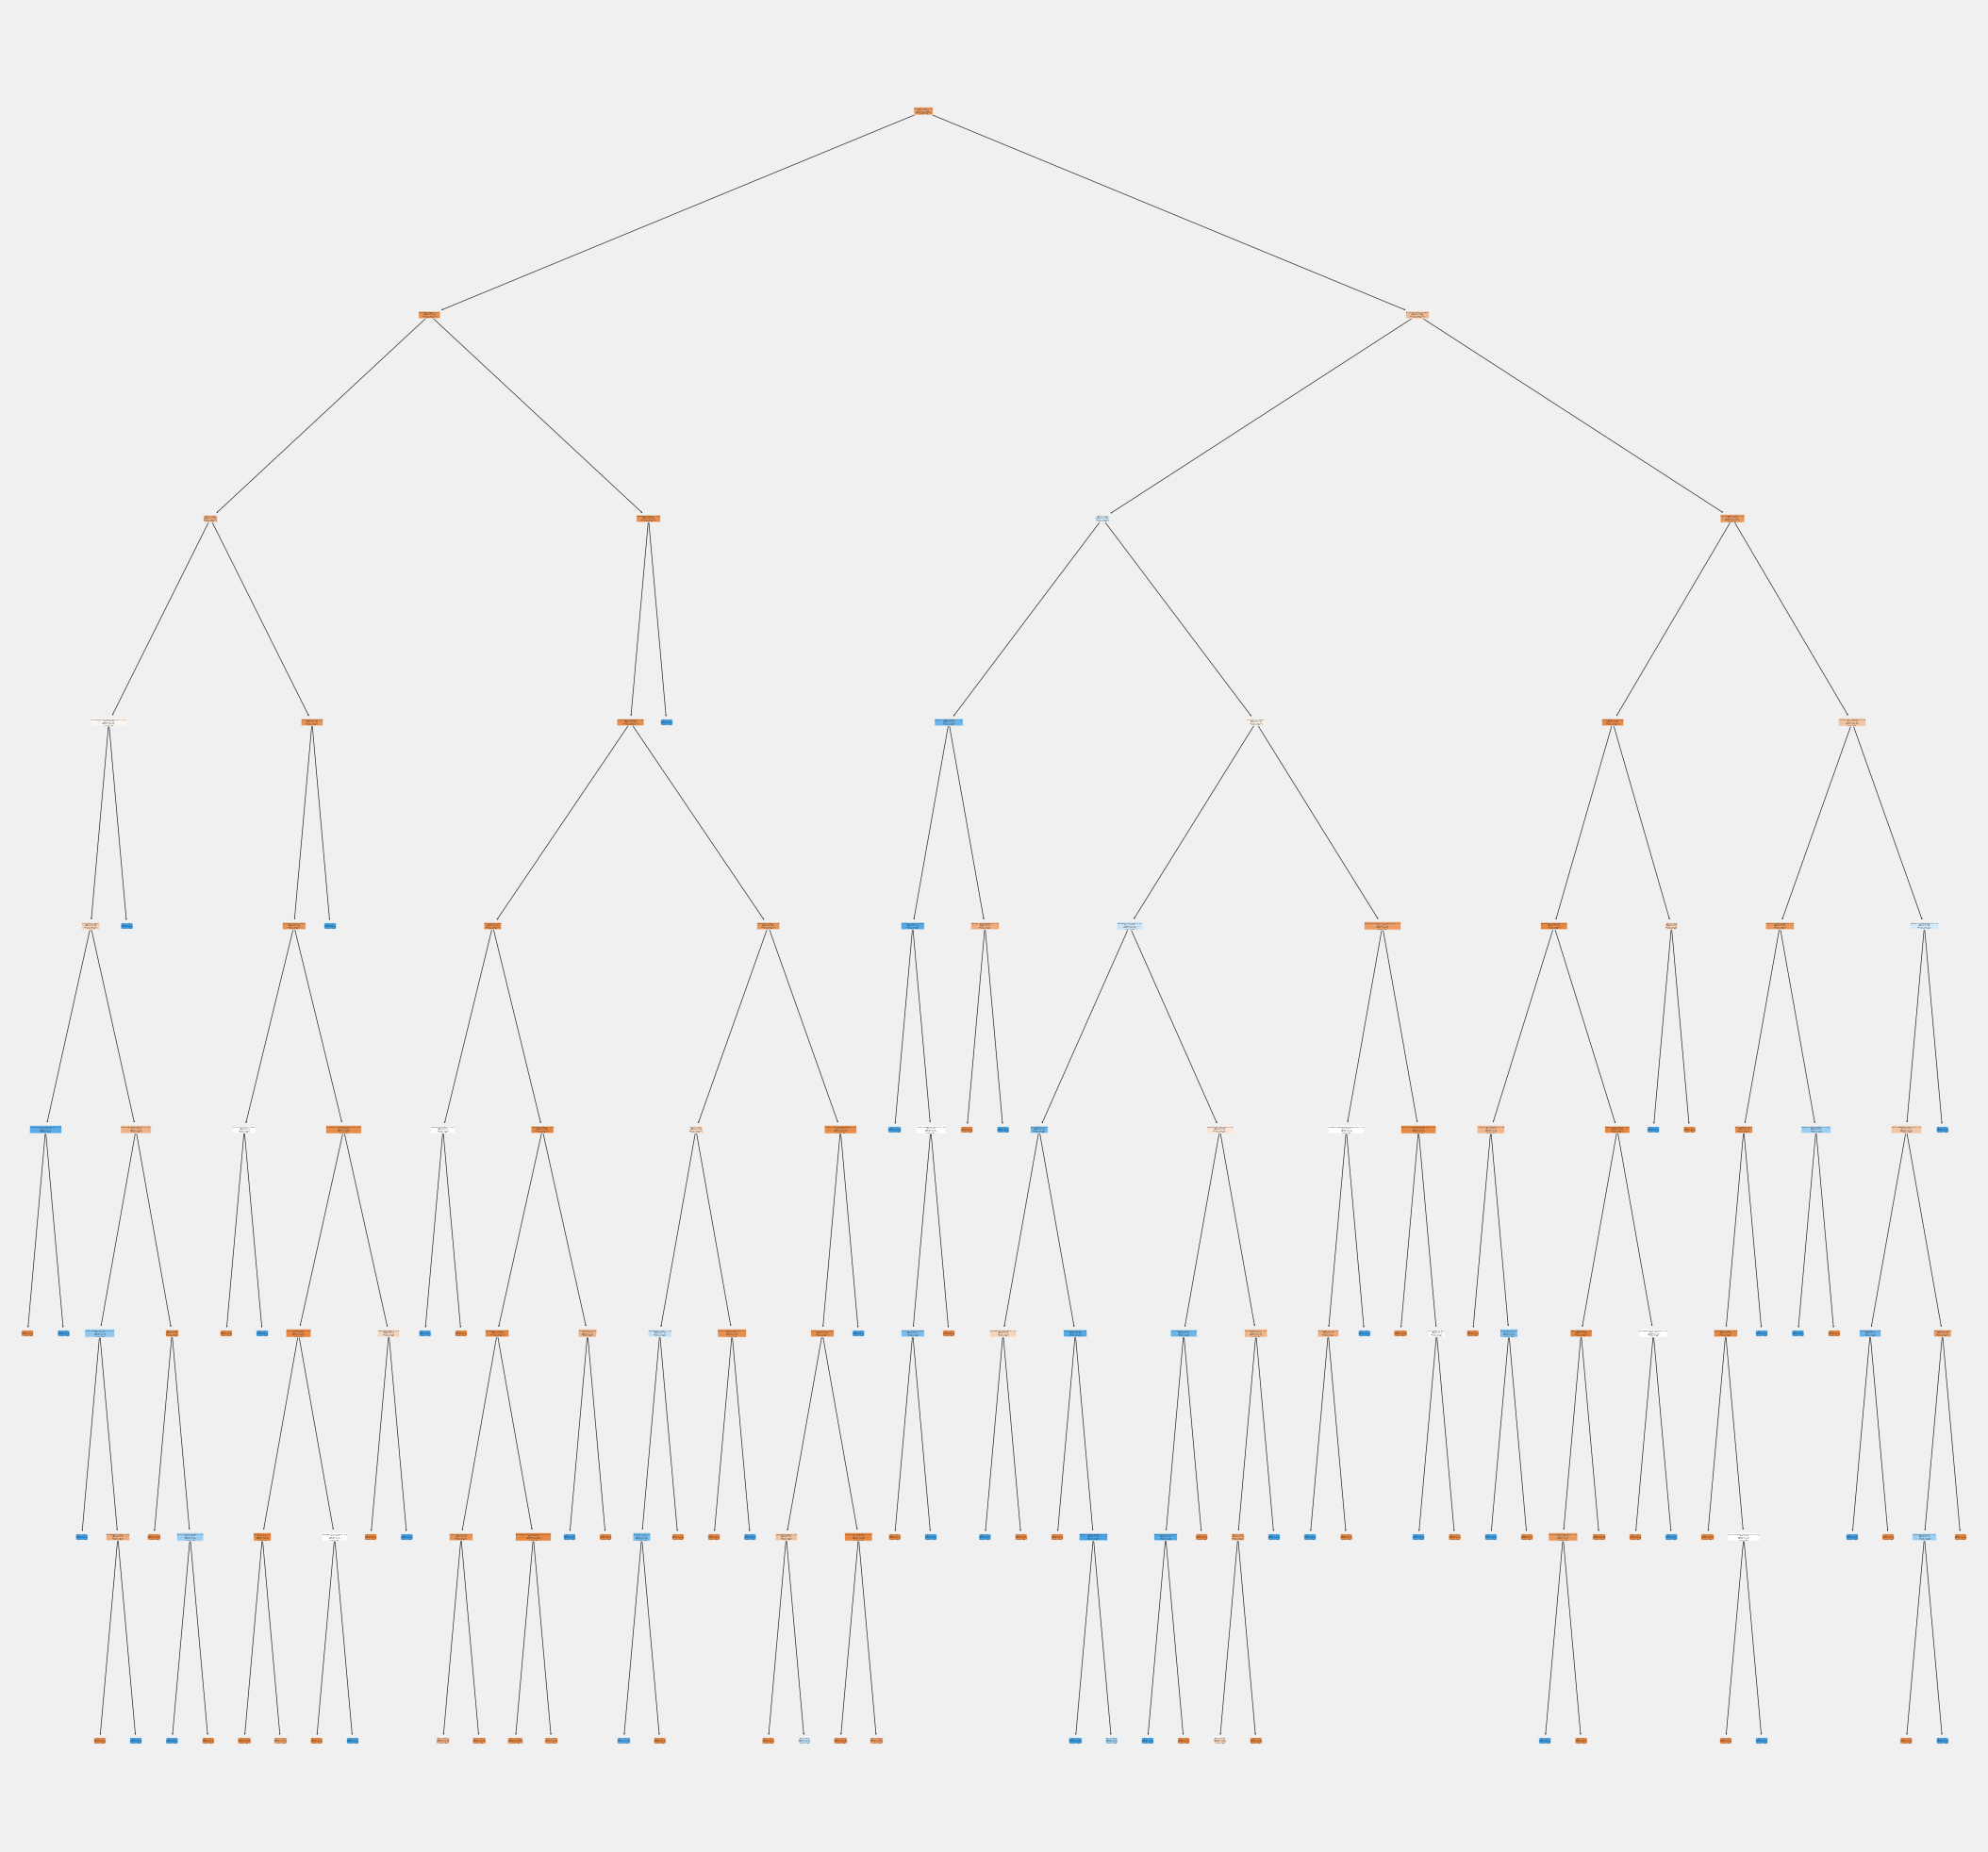

In [ ]:
y = pd.DataFrame(cleaned_data_ohe['Attrition'])
X = pd.DataFrame(cleaned_data_ohe.drop('Attrition', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

dectree = DecisionTreeClassifier(max_depth = 8)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"])

Train Data
Accuracy  :	 0.9591836734693877

TPR Train :	 0.7724550898203593
TNR Train :	 0.9953596287703016

FPR Train :	 0.004640371229698376
FNR Train :	 0.2275449101796407


<Axes: >

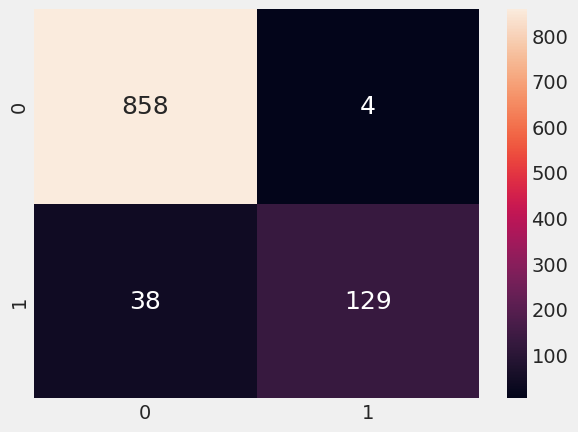

In [ ]:
y_train_pred = dectree.predict(X_train)

print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sns.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8072562358276644

TPR Test :	 0.2857142857142857
TNR Test :	 0.9056603773584906

FPR Test :	 0.09433962264150944
FNR Test :	 0.7142857142857143


<Axes: >

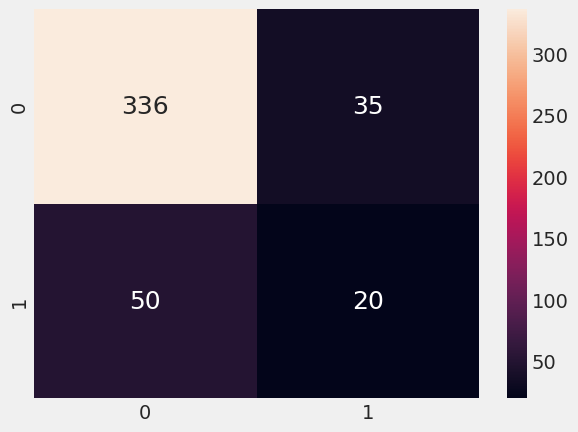

In [ ]:
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

###Attempt 1 - Select few Variables from Decision Tree

In [ ]:
selected_variables = cleaned_data_ohe[['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','BusinessTravel_Non-Travel']]

In [ ]:
#Set the values of YearsAtCompany from 0 to 1 to avoid infinity 
i = 0
while i < 1470:
  if(selected_variables['YearsAtCompany'][i] == 0):
    selected_variables['YearsAtCompany'][i] = 1
  i = i +1

#Set the values of BusinessTravel_Non-Travel from 0 to 1 to prevent infinity when inverting 
i = 0
while i < 1470:
  if(selected_variables['BusinessTravel_Non-Travel'][i] == 0):
    selected_variables['BusinessTravel_Non-Travel'][i] = 1
  else:
      selected_variables['BusinessTravel_Non-Travel'][i] = 0
  i = i +1

<ipython-input-53-4c5841da787a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['YearsAtCompany'][i] = 1
<ipython-input-53-4c5841da787a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['BusinessTravel_Non-Travel'][i] = 1
<ipython-input-53-4c5841da787a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['BusinessTravel_Non-Travel'][i] = 0


In [ ]:
#Inverse Age, YearsAtCompany and DailyRate - Low value higher attrition rate
selected_variables['Age'] = 1/selected_variables['Age']
selected_variables['YearsAtCompany'] = 1/selected_variables['YearsAtCompany']
selected_variables['DailyRate'] = 1/selected_variables['DailyRate']

<ipython-input-54-e1edaffc876e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['Age'] = 1/selected_variables['Age']
<ipython-input-54-e1edaffc876e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['YearsAtCompany'] = 1/selected_variables['YearsAtCompany']
<ipython-input-54-e1edaffc876e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Identify columns to normalize
cols_to_normalize = ['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','BusinessTravel_Non-Travel']
# Use MinMaxScaler() to normalize data in each column
scaler = MinMaxScaler()
selected_variables[cols_to_normalize] = scaler.fit_transform(selected_variables[cols_to_normalize])

# Print normalized DataFrame
print(selected_variables.head())

   OverTime_Yes  YearsAtCompany  Age  BusinessTravel_Travel_Frequently  \
0          1.00            0.15 0.20                              0.00   
1          0.00            0.08 0.10                              1.00   
2          1.00            1.00 0.27                              0.00   
3          1.00            0.10 0.35                              1.00   
4          0.00            0.49 0.52                              0.00   

   DailyRate  BusinessTravel_Non-Travel  
0       0.03                       1.00  
1       0.32                       1.00  
2       0.01                       1.00  
3       0.01                       1.00  
4       0.11                       1.00  


<ipython-input-55-ed8f149bb7b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables[cols_to_normalize] = scaler.fit_transform(selected_variables[cols_to_normalize])


In [ ]:
#Weighted Selected Variables as wsv
wsv = selected_variables
# Define variables to rank by and their weights
variable_weights = {
    'OverTime_Yes':1/6,
    'YearsAtCompany':1/6,
    'Age':1/6,
    'BusinessTravel_Travel_Frequently':1/6,
    'DailyRate':1/6,
    'BusinessTravel_Non-Travel':1/6
}

# Multiply each variable by its weight to get a weighted value for each row
for variable, weight in variable_weights.items():
    wsv[f'Weighted_{variable}'] = wsv[variable] * weight

# Add up the weighted values for each row to get a total weighted score
wsv['Total_Weighted_Score'] = wsv[[f'Weighted_{variable}' for variable in variable_weights]].sum(axis=1)

#add the Attrition
wsv["Attrition"] = cleaned_data['Attrition']

# Sort the DataFrame by the total weighted score
wsv_sorted = wsv.sort_values(by='Total_Weighted_Score', ascending=False)

#Rank the Rows
wsv_sorted['Rank'] = wsv['Total_Weighted_Score'].rank(ascending=False)

#reindex the Data
wsv_sorted = wsv_sorted.reset_index()

#Count how many Attrition yes is at the top of the dataset
i= 0 
count = 0
for i in range(237):
    if(wsv_sorted['Attrition'][i] == 1):
        count+=1
    i = i+1
#Calculate the accurary of the weighted model
count/237

<ipython-input-56-82b6f14dc885>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv[f'Weighted_{variable}'] = wsv[variable] * weight
<ipython-input-56-82b6f14dc885>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv[f'Weighted_{variable}'] = wsv[variable] * weight
<ipython-input-56-82b6f14dc885>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

0.42616033755274263

###Attempt 2 - Adding More Variables


In [ ]:
selected_variables2 = cleaned_data_ohe[['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','BusinessTravel_Non-Travel','WorkLifeBalance High_True','JobRole_Research Scientist','PercentSalaryHike','YearsInCurrentRole']]

In [ ]:
#Set the values of YearsAtCompany from 0 to 1 to avoid infinity 
i = 0
while i < 1470:
  if(selected_variables2['YearsAtCompany'][i] == 0):
    selected_variables2['YearsAtCompany'][i] = 1
  i = i +1

#Invert the values from 0 to 1 and 1 to 0 as BusinessTravel_Non-Travel == 0 means likely to attrition
i = 0
while i < 1470:
  if(selected_variables2['BusinessTravel_Non-Travel'][i] == 0):
    selected_variables2['BusinessTravel_Non-Travel'][i] = 1
  else:
      selected_variables2['BusinessTravel_Non-Travel'][i] = 0
  i = i +1

#nvert the values from 0 to 1 and 1 to 0 as WorkLifeBalance High_True == 0 means likely to attrition
while i < 1470:
  if(selected_variables2['WorkLifeBalance High_True'][i] == 0):
    selected_variables2['WorkLifeBalance High_True'][i] = 1
  else:
      selected_variables2['WorkLifeBalance High_True'][i] = 0
  i = i +1

#nvert the values from 0 to 1 and 1 to 0 as JobRole_Research Scientist == 0 means likely to attrition
i = 0
while i < 1470:
  if(selected_variables2['JobRole_Research Scientist'][i] == 0):
    selected_variables2['JobRole_Research Scientist'][i] = 1
  else:
      selected_variables2['JobRole_Research Scientist'][i] = 0
  i = i +1

#Set the values of YearsInCurrentRole from 0 to 1 to avoid infinity 
i = 0
while i < 1470:
  if(selected_variables2['YearsInCurrentRole'][i] == 0):
    selected_variables2['YearsInCurrentRole'][i] = 1
  i = i +1

<ipython-input-58-9fcc11cfa100>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables2['YearsAtCompany'][i] = 1
<ipython-input-58-9fcc11cfa100>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables2['BusinessTravel_Non-Travel'][i] = 1
<ipython-input-58-9fcc11cfa100>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables2['BusinessTravel_Non-Travel'][i] = 0
<ipython-input-58-9fcc11cfa100>:29: S

In [ ]:
#Inverse Age ,YearsAtCompany,DailyRate and YearsInCurrentRole - Low Age, YearsAtCompany,DailyRate and YearsInCurrentRole more likely to attrition
selected_variables2['Age'] = 1/selected_variables2['Age']
selected_variables2['YearsAtCompany'] = 1/selected_variables2['YearsAtCompany']
selected_variables2['DailyRate'] = 1/selected_variables2['DailyRate']
selected_variables2['YearsInCurrentRole'] = 1/selected_variables2['YearsInCurrentRole']

<ipython-input-59-2d4a4e9b1127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables2['Age'] = 1/selected_variables2['Age']
<ipython-input-59-2d4a4e9b1127>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables2['YearsAtCompany'] = 1/selected_variables2['YearsAtCompany']
<ipython-input-59-2d4a4e9b1127>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Identify columns to normalize
cols_to_normalize = ['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','BusinessTravel_Non-Travel','WorkLifeBalance High_True','JobRole_Research Scientist',"PercentSalaryHike",'YearsInCurrentRole']
# Use MinMaxScaler() to normalize data in each column
scaler = MinMaxScaler()
selected_variables2[cols_to_normalize] = scaler.fit_transform(selected_variables2[cols_to_normalize])

# Print normalized DataFrame
print(selected_variables2.head())

   OverTime_Yes  YearsAtCompany  Age  BusinessTravel_Travel_Frequently  \
0          1.00            0.15 0.20                              0.00   
1          0.00            0.08 0.10                              1.00   
2          1.00            1.00 0.27                              0.00   
3          1.00            0.10 0.35                              1.00   
4          0.00            0.49 0.52                              0.00   

   DailyRate  BusinessTravel_Non-Travel  WorkLifeBalance High_True  \
0       0.03                       1.00                       0.00   
1       0.32                       1.00                       1.00   
2       0.01                       1.00                       1.00   
3       0.01                       1.00                       1.00   
4       0.11                       1.00                       1.00   

   JobRole_Research Scientist  PercentSalaryHike  YearsInCurrentRole  
0                        1.00               0.00               

<ipython-input-60-203eaf3f8bee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables2[cols_to_normalize] = scaler.fit_transform(selected_variables2[cols_to_normalize])


In [ ]:
#Weighted Selected Variables as wsv
wsv2 = selected_variables2
# Define variables to rank by and their weights
variable_weights = {
    'OverTime_Yes':1/10,
    'YearsAtCompany':1/10,
    'Age':1/10,
    'BusinessTravel_Travel_Frequently':1/10,
    'DailyRate':1/10,
    'BusinessTravel_Non-Travel':1/10,
    'WorkLifeBalance High_True':1/10,
    'JobRole_Research Scientist':1/10,
    'PercentSalaryHike':1/10,
    'YearsInCurrentRole':1/10

}

# Multiply each variable by its weight to get a weighted value for each row
for variable, weight in variable_weights.items():
    wsv2[f'Weighted_{variable}'] = wsv2[variable] * weight

# Add up the weighted values for each row to get a total weighted score
wsv2['Total_Weighted_Score'] = wsv2[[f'Weighted_{variable}' for variable in variable_weights]].sum(axis=1)

#add the Attrition
wsv2["Attrition"] = cleaned_data['Attrition']

# Sort the DataFrame by the total weighted score
wsv_sorted2 = wsv2.sort_values(by='Total_Weighted_Score', ascending=False)

#Rank the Rows
wsv_sorted2['Rank'] = wsv['Total_Weighted_Score'].rank(ascending=False)

#reindex the Data
wsv_sorted2 = wsv_sorted2.reset_index()

#Count how many Attrition yes is at the top of the dataset
i= 0 
count = 0
for i in range(237):
    if(wsv_sorted2['Attrition'][i] == 1):
        count+=1
    i = i+1
#Calculate the accurary of the weighted model
count/237

<ipython-input-61-4aa2d621de80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv2[f'Weighted_{variable}'] = wsv2[variable] * weight
<ipython-input-61-4aa2d621de80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv2[f'Weighted_{variable}'] = wsv2[variable] * weight
<ipython-input-61-4aa2d621de80>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

0.3670886075949367

Not Much Increase when other Variables are added

##Try to change the weightage using XGBoost

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   0]
 [  0 167]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   862.00 167.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[361  10]
 [ 52  18]]
ACCURACY SCORE:
0.8594
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.64      0.86       0.76          0.84
recall      0.97  0.26      0.86       0.62          0.86
f1-score    0.92  0.37      0.86       0.64          0.83
support   371.00 70.00      0.86     441.00        441.00


In [ ]:
scores_dict= {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

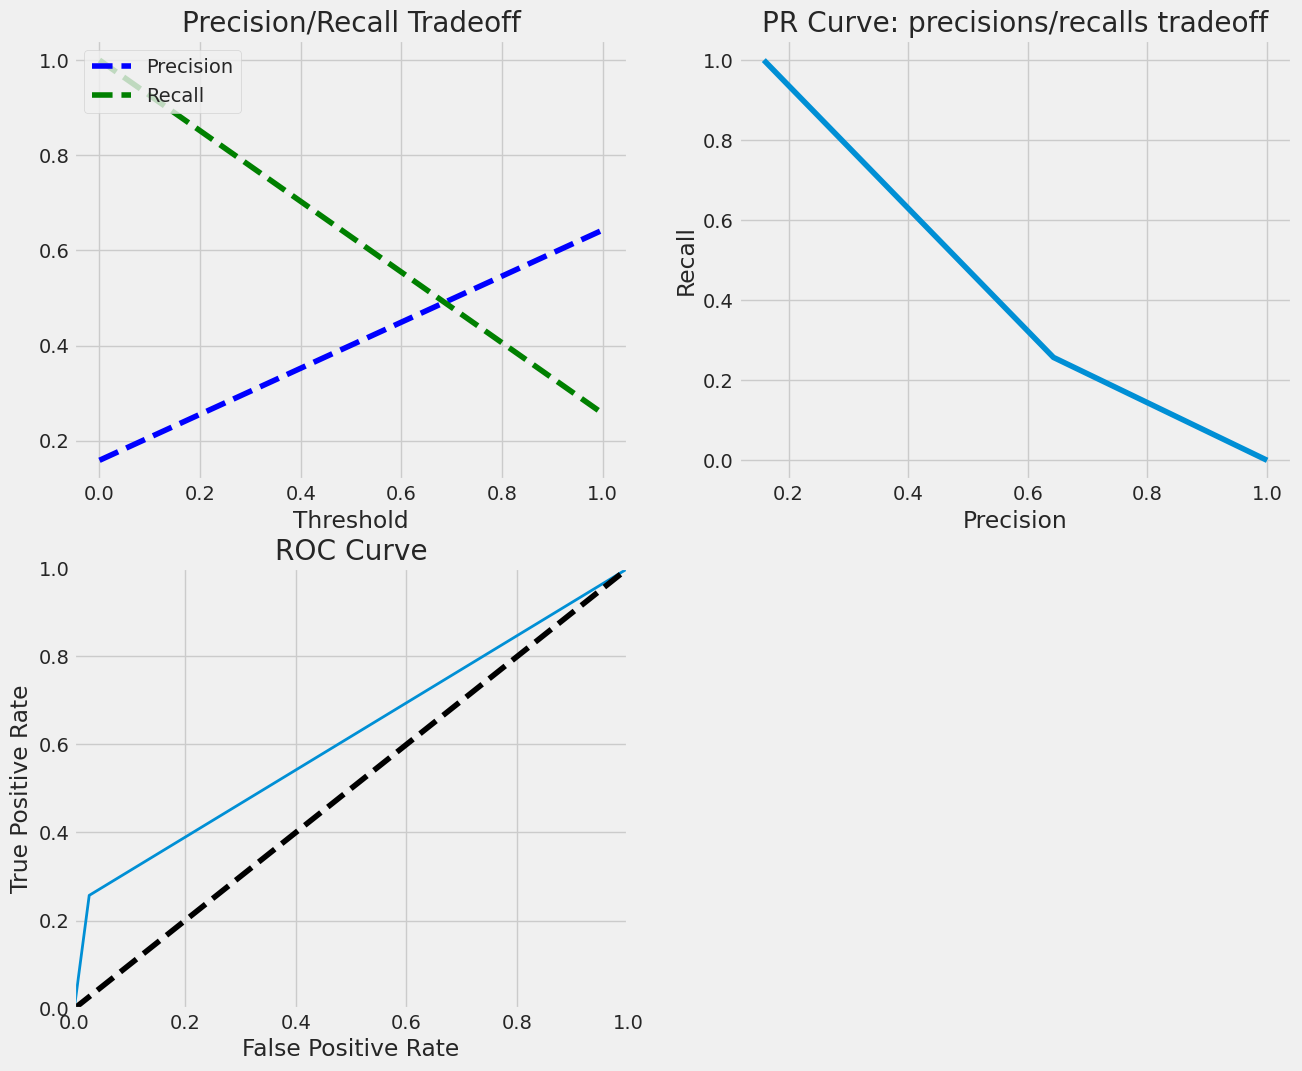

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

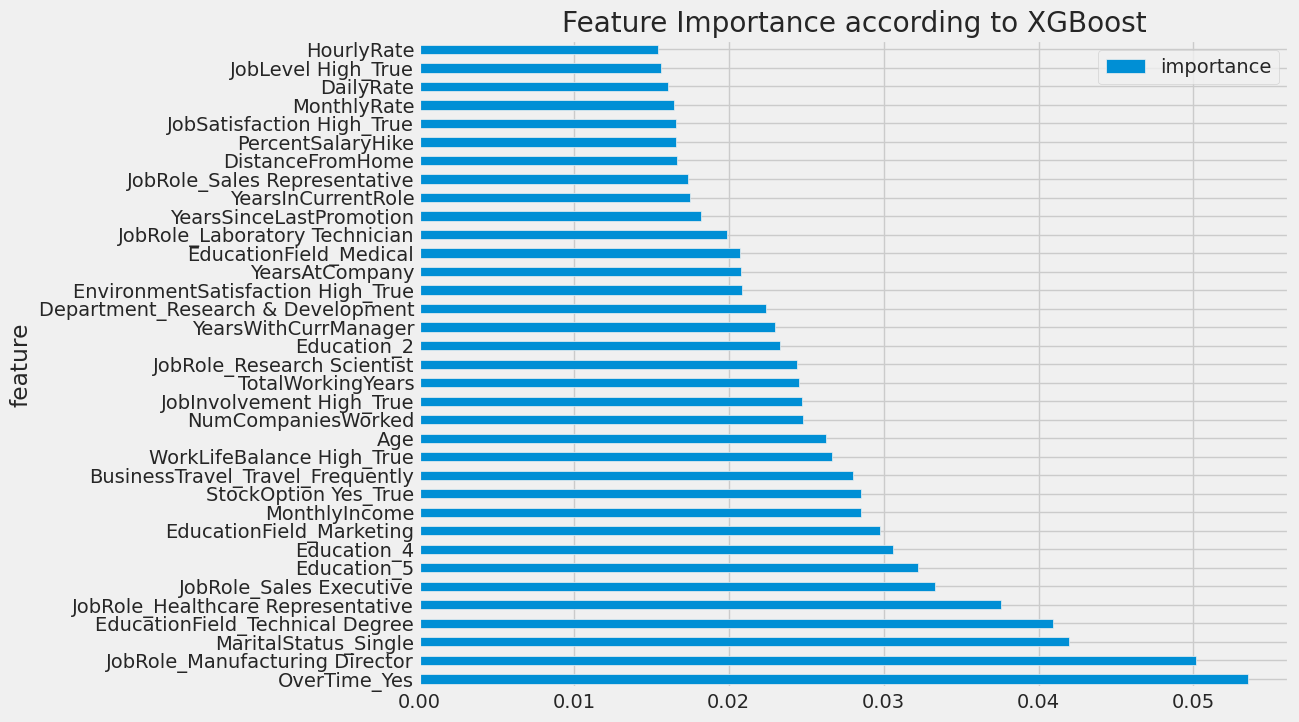

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

###Attempt 3 - Using Weightage from XGBoost

In [ ]:
selected_variables3 = cleaned_data_ohe[['OverTime_Yes','JobRole_Manufacturing Director','MaritalStatus_Single','EducationField_Technical Degree','JobRole_Healthcare Representative','JobRole_Sales Executive']]

In [ ]:
#invert the values from 0 to 1 and 1 to 0 as JobRole_Manufacturing Director == 0 means likely to attrition 
i = 0
while i < 1470:
  if(selected_variables3['JobRole_Manufacturing Director'][i] == 0):
    selected_variables3['JobRole_Manufacturing Director'][i] = 1
  else:
      selected_variables3['JobRole_Manufacturing Director'][i] = 0
  i = i +1

#invert the values from 0 to 1 and 1 to 0 as JobRole_Healthcare Representative == 0 means likely to attrition 
i = 0
while i < 1470:
  if(selected_variables3['JobRole_Healthcare Representative'][i] == 0):
    selected_variables3['JobRole_Healthcare Representative'][i] = 1
  else:
      selected_variables3['JobRole_Healthcare Representative'][i] = 0
  i = i +1

<ipython-input-69-c44ce647e8ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['JobRole_Manufacturing Director'][i] = 1
<ipython-input-69-c44ce647e8ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['JobRole_Manufacturing Director'][i] = 0
<ipython-input-69-c44ce647e8ea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['JobRole_Healthcare Representative'][i] = 1
<ipython-

In [ ]:
# Identify columns to normalize
cols_to_normalize3 = ['OverTime_Yes','JobRole_Manufacturing Director','MaritalStatus_Single','EducationField_Technical Degree','JobRole_Healthcare Representative','JobRole_Sales Executive']
# Use MinMaxScaler() to normalize data in each column
scaler = MinMaxScaler()
selected_variables3[cols_to_normalize3] = scaler.fit_transform(selected_variables3[cols_to_normalize3])

# Print normalized DataFrame
print(selected_variables3.head())

   OverTime_Yes  JobRole_Manufacturing Director  MaritalStatus_Single  \
0          1.00                            1.00                  1.00   
1          0.00                            1.00                  0.00   
2          1.00                            1.00                  1.00   
3          1.00                            1.00                  0.00   
4          0.00                            1.00                  0.00   

   EducationField_Technical Degree  JobRole_Healthcare Representative  \
0                             0.00                               1.00   
1                             0.00                               1.00   
2                             0.00                               1.00   
3                             0.00                               1.00   
4                             0.00                               1.00   

   JobRole_Sales Executive  
0                     1.00  
1                     0.00  
2                     0.00  
3     

<ipython-input-70-110a9bb92d99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3[cols_to_normalize3] = scaler.fit_transform(selected_variables3[cols_to_normalize3])


In [ ]:
#Weighted Selected Variables as wsv
wsv3 = selected_variables3
# Define variables to rank by and their weights
variable_weights = {
    'OverTime_Yes':0.55,
    'JobRole_Manufacturing Director':0.5,
    'MaritalStatus_Single':0.42,
    'EducationField_Technical Degree':0.41,
    'JobRole_Healthcare Representative':0.38,
    'JobRole_Sales Executive':0.33

}

# Multiply each variable by its weight to get a weighted value for each row
for variable, weight in variable_weights.items():
    wsv3[f'Weighted_{variable}'] = wsv3[variable] * weight

# Add up the weighted values for each row to get a total weighted score
wsv3['Total_Weighted_Score'] = wsv3[[f'Weighted_{variable}' for variable in variable_weights]].sum(axis=1)

#add the Attrition
wsv3["Attrition"] = cleaned_data['Attrition']

# Sort the DataFrame by the total weighted score
wsv_sorted3 = wsv3.sort_values(by='Total_Weighted_Score', ascending=False)

#Rank the Rows
wsv_sorted3['Rank'] = wsv3['Total_Weighted_Score'].rank(ascending=False)

#reindex the Data
wsv_sorted3 = wsv_sorted3.reset_index()

#Count how many Attrition yes is at the top of the dataset
i= 0 
count = 0
for i in range(237):
    if(wsv_sorted3['Attrition'][i] == 1):
        count+=1
    i = i+1
#Calculate the accurary of the weighted model
count/237

<ipython-input-71-fd72a0a71d42>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv3[f'Weighted_{variable}'] = wsv3[variable] * weight
<ipython-input-71-fd72a0a71d42>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv3[f'Weighted_{variable}'] = wsv3[variable] * weight
<ipython-input-71-fd72a0a71d42>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

0.3924050632911392

###Attempt 3.5: Increase Variables

In [ ]:
selected_variables3 = cleaned_data_ohe[['OverTime_Yes','JobRole_Manufacturing Director','MaritalStatus_Single','EducationField_Technical Degree','JobRole_Healthcare Representative','JobRole_Sales Executive','Education_5','Education_4','EducationField_Marketing',"MonthlyIncome"]]

In [ ]:
#invert the values from 0 to 1 and 1 to 0 as JobRole_Manufacturing Director == 0 means likely to attrition 
i = 0
while i < 1470:
  if(selected_variables3['JobRole_Manufacturing Director'][i] == 0):
    selected_variables3['JobRole_Manufacturing Director'][i] = 1
  else:
      selected_variables3['JobRole_Manufacturing Director'][i] = 0
  i = i +1

#invert the values from 0 to 1 and 1 to 0 as JobRole_Healthcare Representative == 0 means likely to attrition 
i = 0
while i < 1470:
  if(selected_variables3['JobRole_Healthcare Representative'][i] == 0):
    selected_variables3['JobRole_Healthcare Representative'][i] = 1
  else:
      selected_variables3['JobRole_Healthcare Representative'][i] = 0
  i = i +1

#invert the values from 0 to 1 and 1 to 0 as Education_4 == 0 means likely to attrition 
i = 0
while i < 1470:
  if(selected_variables3['Education_4'][i] == 0):
    selected_variables3['Education_4'][i] = 1
  else:
      selected_variables3['Education_4'][i] = 0
  i = i +1

<ipython-input-73-7f1580655d46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['JobRole_Manufacturing Director'][i] = 1
<ipython-input-73-7f1580655d46>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['JobRole_Manufacturing Director'][i] = 0
<ipython-input-73-7f1580655d46>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['JobRole_Healthcare Representative'][i] = 1
<ipython-

In [ ]:
#Inverse MonthlyIncome - Low MonthlyIncome more like to attrition
selected_variables3['MonthlyIncome'] = 1/selected_variables3['MonthlyIncome']

<ipython-input-74-0df529613951>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3['MonthlyIncome'] = 1/selected_variables3['MonthlyIncome']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Load dataset into a Pandas DataFrame

# Identify columns to normalize
cols_to_normalize3 = ['OverTime_Yes','JobRole_Manufacturing Director','MaritalStatus_Single','EducationField_Technical Degree','JobRole_Healthcare Representative','JobRole_Sales Executive','Education_5','Education_4','EducationField_Marketing',"MonthlyIncome"]
# Use MinMaxScaler() to normalize data in each column
scaler = MinMaxScaler()
selected_variables3[cols_to_normalize3] = scaler.fit_transform(selected_variables3[cols_to_normalize3])

# Print normalized DataFrame
print(selected_variables3.head())

   OverTime_Yes  JobRole_Manufacturing Director  MaritalStatus_Single  \
0          1.00                            1.00                  1.00   
1          0.00                            1.00                  0.00   
2          1.00                            1.00                  1.00   
3          1.00                            1.00                  0.00   
4          0.00                            1.00                  0.00   

   EducationField_Technical Degree  JobRole_Healthcare Representative  \
0                             0.00                               1.00   
1                             0.00                               1.00   
2                             0.00                               1.00   
3                             0.00                               1.00   
4                             0.00                               1.00   

   JobRole_Sales Executive  Education_5  Education_4  \
0                     1.00         0.00         1.00   
1         

<ipython-input-75-f66f1b8ed110>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables3[cols_to_normalize3] = scaler.fit_transform(selected_variables3[cols_to_normalize3])


In [ ]:
#Weighted Selected Variables as wsv
wsv3 = selected_variables3
# Define variables to rank by and their weights
variable_weights = {
    'OverTime_Yes':0.55,
    'JobRole_Manufacturing Director':0.5,
    'MaritalStatus_Single':0.42,
    'EducationField_Technical Degree':0.41,
    'JobRole_Healthcare Representative':0.38,
    'JobRole_Sales Executive':0.33,
    'Education_5':0.32,
    'Education_4':0.3,
    'EducationField_Marketing':0.29,
    'MonthlyIncome':0.28
}

# Multiply each variable by its weight to get a weighted value for each row
for variable, weight in variable_weights.items():
    wsv3[f'Weighted_{variable}'] = wsv3[variable] * weight

# Add up the weighted values for each row to get a total weighted score
wsv3['Total_Weighted_Score'] = wsv3[[f'Weighted_{variable}' for variable in variable_weights]].sum(axis=1)

#add the Attrition
wsv3["Attrition"] = cleaned_data['Attrition']

# Sort the DataFrame by the total weighted score
wsv_sorted3 = wsv3.sort_values(by='Total_Weighted_Score', ascending=False)

#Rank the Rows
wsv_sorted3['Rank'] = wsv3['Total_Weighted_Score'].rank(ascending=False)

#reindex the Data
wsv_sorted3 = wsv_sorted3.reset_index()

#Count how many Attrition yes is at the top of the dataset
i= 0 
count = 0
for i in range(237):
    if(wsv_sorted3['Attrition'][i] == 1):
        count+=1
    i = i+1
#Calculate the accurary of the weighted model
count/237

<ipython-input-76-4a90253277e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv3[f'Weighted_{variable}'] = wsv3[variable] * weight
<ipython-input-76-4a90253277e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv3[f'Weighted_{variable}'] = wsv3[variable] * weight
<ipython-input-76-4a90253277e5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

0.3881856540084388

###Attempt 4: Using Variables from Decision Tree and Weightage from XGBoost

In [ ]:
selected_variables4 = cleaned_data_ohe[['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','BusinessTravel_Non-Travel']]

In [ ]:
#Set the values of YearsAtCompany from 0 to 1 to avoid infinity 
i = 0
while i < 1470:
  if(selected_variables4['YearsAtCompany'][i] == 0):
    selected_variables4['YearsAtCompany'][i] = 1
  i = i +1

#invert the values from 0 to 1 and 1 to 0 as BusinessTravel_Non-Travel means likely to attrition
i = 0
while i < 1470:
  if(selected_variables4['BusinessTravel_Non-Travel'][i] == 0):
    selected_variables4['BusinessTravel_Non-Travel'][i] = 1
  else:
      selected_variables4['BusinessTravel_Non-Travel'][i] = 0
  i = i +1

<ipython-input-78-ccfdd6d885fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables4['YearsAtCompany'][i] = 1
<ipython-input-78-ccfdd6d885fa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables4['BusinessTravel_Non-Travel'][i] = 1
<ipython-input-78-ccfdd6d885fa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables4['BusinessTravel_Non-Travel'][i] = 0


In [ ]:
#Inverse Age,YearsAtCompany and DailyRate - Low Age, YearsAtCompany and DailyRate more likely to attrition
selected_variables4['Age'] = 1/selected_variables4['Age']
selected_variables4['YearsAtCompany'] = 1/selected_variables4['YearsAtCompany']
selected_variables4['DailyRate'] = 1/selected_variables4['DailyRate']

<ipython-input-79-86161f9badfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables4['Age'] = 1/selected_variables4['Age']
<ipython-input-79-86161f9badfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables4['YearsAtCompany'] = 1/selected_variables4['YearsAtCompany']
<ipython-input-79-86161f9badfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Identify columns to normalize
cols_to_normalize4 = ['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','BusinessTravel_Non-Travel']
# Use MinMaxScaler() to normalize data in each column
scaler = MinMaxScaler()
selected_variables4[cols_to_normalize4] = scaler.fit_transform(selected_variables4[cols_to_normalize4])

# Print normalized DataFrame
print(selected_variables.head())

   OverTime_Yes  YearsAtCompany  Age  BusinessTravel_Travel_Frequently  \
0          1.00            0.15 0.20                              0.00   
1          0.00            0.08 0.10                              1.00   
2          1.00            1.00 0.27                              0.00   
3          1.00            0.10 0.35                              1.00   
4          0.00            0.49 0.52                              0.00   

   DailyRate  BusinessTravel_Non-Travel  Weighted_OverTime_Yes  \
0       0.03                       1.00                   0.17   
1       0.32                       1.00                   0.00   
2       0.01                       1.00                   0.17   
3       0.01                       1.00                   0.17   
4       0.11                       1.00                   0.00   

   Weighted_YearsAtCompany  Weighted_Age  \
0                     0.02          0.03   
1                     0.01          0.02   
2                     0.17

<ipython-input-80-1872bd622431>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables4[cols_to_normalize4] = scaler.fit_transform(selected_variables4[cols_to_normalize4])


In [ ]:
#Weighted Selected Variables as wsv
wsv4 = selected_variables4
# Define variables to rank by and their weights
variable_weights = {
    'OverTime_Yes':0.55,
    'YearsAtCompany':0.21,
    'Age':0.26,
    'BusinessTravel_Travel_Frequently':0.27,
    'DailyRate':0.16,
    'BusinessTravel_Non-Travel':0.27
}

# Multiply each variable by its weight to get a weighted value for each row
for variable, weight in variable_weights.items():
    wsv4[f'Weighted_{variable}'] = wsv4[variable] * weight

# Add up the weighted values for each row to get a total weighted score
wsv4['Total_Weighted_Score'] = wsv4[[f'Weighted_{variable}' for variable in variable_weights]].sum(axis=1)

#add the Attrition
wsv4["Attrition"] = cleaned_data['Attrition']

# Sort the DataFrame by the total weighted score
wsv_sorted4 = wsv4.sort_values(by='Total_Weighted_Score', ascending=False)

#Rank the Rows
wsv_sorted4['Rank'] = wsv4['Total_Weighted_Score'].rank(ascending=False)

#reindex the Data
wsv_sorted4 = wsv_sorted4.reset_index()

#Count how many Attrition yes is at the top of the dataset
i= 0 
count = 0
for i in range(237):
    if(wsv_sorted4['Attrition'][i] == 1):
        count+=1
    i = i+1
#Calculate the accurary of the weighted model
count/237

<ipython-input-81-0c7bd3c971db>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv4[f'Weighted_{variable}'] = wsv4[variable] * weight
<ipython-input-81-0c7bd3c971db>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv4[f'Weighted_{variable}'] = wsv4[variable] * weight
<ipython-input-81-0c7bd3c971db>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

0.41350210970464135

###Attempt 5 - Combining Variables from Decision Tree and XGBoost(Using weightage from XGBoost)


In [ ]:
selected_variables5 = cleaned_data_ohe[['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','MaritalStatus_Single','MonthlyIncome','JobRole_Manufacturing Director','TotalWorkingYears','HourlyRate']]

In [ ]:
#Set the values of YearsAtCompany from 0 to 1 to avoid infinity 
i = 0
while i < 1470:
  if(selected_variables5['YearsAtCompany'][i] == 0):
    selected_variables5['YearsAtCompany'][i] = 1
  i = i +1

#invert the values from 0 to 1 and 1 to 0 as JobRole_Manufacturing Director means likely to attrition
i = 0
while i < 1470:
  if(selected_variables5['JobRole_Manufacturing Director'][i] == 0):
    selected_variables5['JobRole_Manufacturing Director'][i] = 1
  else:
      selected_variables5['JobRole_Manufacturing Director'][i] = 0
  i = i +1

#Set the values of TotalWorkingYears from 0 to 1 to avoid infinity 
i = 0
while i < 1470:
  if(selected_variables5['TotalWorkingYears'][i] == 0):
    selected_variables5['TotalWorkingYears'][i] = 1
  i = i +1



<ipython-input-83-270119a42624>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables5['YearsAtCompany'][i] = 1
<ipython-input-83-270119a42624>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables5['JobRole_Manufacturing Director'][i] = 1
<ipython-input-83-270119a42624>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables5['JobRole_Manufacturing Director'][i] = 0
<ipython-input-83-270119a42

In [ ]:
#Inverse Age,YearsAtCompany,DailyRate,MonthlyIncome,TotalWorkingYears and HourlyRate - Low Age,YearsAtCompany,DailyRate,MonthlyIncome,TotalWorkingYears and HourlyRate more likely to attrition
selected_variables5['Age'] = 1/selected_variables5['Age']
selected_variables5['YearsAtCompany'] = 1/selected_variables5['YearsAtCompany']
selected_variables5['DailyRate'] = 1/selected_variables5['DailyRate']
selected_variables5['MonthlyIncome'] = 1/selected_variables5['MonthlyIncome']
selected_variables5['TotalWorkingYears'] = 1/selected_variables5['TotalWorkingYears']
selected_variables5['HourlyRate'] = 1/selected_variables5['HourlyRate']

<ipython-input-84-39066ec6b773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables5['Age'] = 1/selected_variables5['Age']
<ipython-input-84-39066ec6b773>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables5['YearsAtCompany'] = 1/selected_variables5['YearsAtCompany']
<ipython-input-84-39066ec6b773>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Identify columns to normalize
cols_to_normalize5 = ['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','MaritalStatus_Single','MonthlyIncome','JobRole_Manufacturing Director','TotalWorkingYears','HourlyRate']
# Use MinMaxScaler() to normalize data in each column
scaler = MinMaxScaler()
selected_variables5[cols_to_normalize5] = scaler.fit_transform(selected_variables5[cols_to_normalize5])

# Print normalized DataFrame
print(selected_variables.head())

   OverTime_Yes  YearsAtCompany  Age  BusinessTravel_Travel_Frequently  \
0          1.00            0.15 0.20                              0.00   
1          0.00            0.08 0.10                              1.00   
2          1.00            1.00 0.27                              0.00   
3          1.00            0.10 0.35                              1.00   
4          0.00            0.49 0.52                              0.00   

   DailyRate  BusinessTravel_Non-Travel  Weighted_OverTime_Yes  \
0       0.03                       1.00                   0.17   
1       0.32                       1.00                   0.00   
2       0.01                       1.00                   0.17   
3       0.01                       1.00                   0.17   
4       0.11                       1.00                   0.00   

   Weighted_YearsAtCompany  Weighted_Age  \
0                     0.02          0.03   
1                     0.01          0.02   
2                     0.17

<ipython-input-85-25e6a44e8a83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables5[cols_to_normalize5] = scaler.fit_transform(selected_variables5[cols_to_normalize5])


In [ ]:
#Weighted Selected Variables as wsv
wsv5 = selected_variables5
# Define variables to rank by and their weights
variable_weights = {
    'OverTime_Yes':0.55,
    'YearsAtCompany':0.21,
    'Age':0.26,
    'BusinessTravel_Travel_Frequently':0.27,
    'DailyRate':0.16,
    'MaritalStatus_Single':0.42,
    'MonthlyIncome':0.28,
    'JobRole_Manufacturing Director':0.5,
    'TotalWorkingYears':0.25,
}

# Multiply each variable by its weight to get a weighted value for each row
for variable, weight in variable_weights.items():
    wsv5[f'Weighted_{variable}'] = wsv5[variable] * weight

# Add up the weighted values for each row to get a total weighted score
wsv5['Total_Weighted_Score'] = wsv5[[f'Weighted_{variable}' for variable in variable_weights]].sum(axis=1)

#add the Attrition
wsv5["Attrition"] = cleaned_data['Attrition']

# Sort the DataFrame by the total weighted score
wsv_sorted5 = wsv5.sort_values(by='Total_Weighted_Score', ascending=False)

#Rank the Rows
wsv_sorted5['Rank'] = wsv5['Total_Weighted_Score'].rank(ascending=False)

#reindex the Data
wsv_sorted5 = wsv_sorted5.reset_index()

#Count how many Attrition yes is at the top of the dataset
i= 0 
count = 0
for i in range(237):
    if(wsv_sorted5['Attrition'][i] == 1):
        count+=1
    i = i+1
#Calculate the accurary of the weighted model
count/237

<ipython-input-86-6eff67f54a1e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv5[f'Weighted_{variable}'] = wsv5[variable] * weight
<ipython-input-86-6eff67f54a1e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wsv5[f'Weighted_{variable}'] = wsv5[variable] * weight
<ipython-input-86-6eff67f54a1e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

0.510548523206751

In [ ]:
final =  cleaned_data_ohe[['OverTime_Yes','YearsAtCompany','Age','BusinessTravel_Travel_Frequently','DailyRate','MaritalStatus_Single','MonthlyIncome','JobRole_Manufacturing Director','TotalWorkingYears','HourlyRate','Attrition']]
final['Total_Weighted_Score'] = wsv5['Total_Weighted_Score']
final = final.sort_values(by='Total_Weighted_Score', ascending=False)
final['Rank'] = wsv5['Total_Weighted_Score'].rank(ascending=False)
final = final.reset_index()
final = final.drop(['index'],axis = 1)
final

<ipython-input-87-5af57eea5a52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Total_Weighted_Score'] = wsv5['Total_Weighted_Score']


OverTime_Yes  YearsAtCompany  Age  BusinessTravel_Travel_Frequently  \
0             1.00               0   18                              1.00   
1             1.00               1   25                              1.00   
2             1.00               0   18                              1.00   
3             1.00               1   20                              1.00   
4             1.00               1   29                              1.00   
...            ...             ...  ...                               ...   
1465          0.00              15   49                              0.00   
1466          0.00              18   40                              0.00   
1467          0.00              20   41                              0.00   
1468          0.00              33   53                              0.00   
1469          0.00              10   54                              0.00   

      DailyRate  MaritalStatus_Single  MonthlyIncome  \
0           544                  1.00           1569   
1           599                  1.00           1118   
2          1306                  1.00           1878   
3           871                  1.00           2926   
4           459                  1.00           2439   
...         ...                   ...            ...   
1465        470                  0.00           6567   
1466        884                  0.00          10435   
1467        582                  0.00          13570   
1468        607                  0.00          10169   
1469       1441                  0.00          10739   

      JobRole_Manufacturing Director  TotalWorkingYears  HourlyRate  \
0                               0.00                  0          70   
1                               0.00                  1          73   
2                               0.00                  0          69   
3                               0.00                  1          66   
4                               0.00                  1          73   
...                              ...                ...         ...   
1465                            1.00                 16          96   
1466                            1.00                 18          80   
1467                            1.00                 21          60   
1468                            1.00                 34          78   
1469                            1.00                 22          56   

      Attrition  Total_Weighted_Score    Rank  
0             1                  2.66    1.00  
1             1                  2.62    2.00  
2             1                  2.61    3.00  
3             1                  2.52    4.00  
4             1                  2.45    5.00  
...         ...                   ...     ...  
1465          0                  0.10 1466.00  
1466          0                  0.09 1467.00  
1467          0                  0.09 1468.00  
1468          1                  0.05 1469.00  
1469          0                  0.05 1470.00  

[1470 rows x 13 columns]

In [ ]:
final.to_csv('cleaned.csv')
